# **CSGO Round Win Classification ML Project**

## *Table of Contents*
> 1. Introduction
> 2. Importing Libraries
> 3. Data Preprocessing
>> 3.1. First Look on the data <br>
>> 3.2. Dealing with categorical data <br>
>> 3.3. Features Generation <br>
>> 3.4. Splitting the data <br>
>> 3.5. Creating pipeline <br>
> 4. Modelling <br>
>> 4.1. Logistic Regression <br>
>> 4.2. K-Nearest Neighbors <br>
>> 4.3. Bernoulli Naive Bayes <br>
>> 4.4. Artificial Neural Networks <br>
>> 4.5. Extreme Gradient Boosting <br>
> 5. Hyperparameter Tuning <br>
>> 5.1. Weights and Biases (wandb.ai) <br>
>> 5.2. Predicting on Holdout Data <br>
>> 5.3. Merging and Stratifying the Holdout and Original Data <br>
> 6. Conclusion



---



Done by: **Owens Vincentio, Joshua Benzon, and Viren Bachani**




## Introduction

### **What is CS:GO?**

CS:GO, a first-person shooter, is a tactical game of two teams, namely Counter Terrorist (CT) and Terrorist (T). The following corresponds to the gameplay:
1.	Best of 30 rounds (first team to reach 16 rounds wins)
2.	Each round timed to 1m55s.
3.	There are 5 players on each team (10 in total)
4.	One team plays as CT and the other as Terrorist.
5.	After 15 rounds played, the teams swap side.
6.	There are 7 different maps.
7.	Winning

    a.	You win a round as Terrorist by either planting the bomb and making sure it explodes, or by eliminating the other team.
    
    b.	You win a round as CT by either eliminating the other team, or by disarming the bomb, should it have been planted.

### Dataset Introduction

Our dataset was originally published by Skybox as part of a challenge. The data set consists of around 700 demos from tournament plays in 2019 and 2020. This dataset contains 97 variables that are namely the features used to determine the target variable. The total number of datapoints in this dataset is 122410.

> [Kaggle Dataset Link](https://www.kaggle.com/datasets/christianlillelund/csgo-round-winner-classification)


#### Columns List & Definition

> 1. **time_left:** *The time left in the current round.*
> 2. **ct_score:** *The current score of the Counter-Terrorist team.*
> 3. **t_score:**  *The current score of the Terrorist team.*
> 4. **map:**	*The map the round is being played on.*	(E.g. de_dust2, de_inferno and de_overpass)
> 5. **bomb_planted:**	*If the bomb has been planted or not.* (False = No, True = Yes)
> 6. **ct_health:** *The total health of all Counter-Terrorist players.* (Player health in range 0-100.)
> 7.**t_health:**	*The total health of all Terrorist players.*	                  (Player health in range 0-100.)
> 8. **ct_armor:** *The total armor of all Counter-Terrorist players.*
> 9. **t_armor:** *The total armor of all Terrorist players.*
> 10. **ct_money**	*The total bankroll of all Counter-Terrorist players.*	        (Amount in USD.)
> 11. **t_money:**	*The total bankroll of all Terrorist players.*	                (Amount in USD.)
> 12. **ct_helmets:**	*Number of helmets on the Counter-Terrorist team.*
> 13. **t_helmets:** *Number of helmets on the Terrorist team.*
> 14. **ct_defuse_kits:**	*Number of defuse kits on the Counter-Terrorist team.*	
> 15. **ct_players_alive:** *Number of alive players on the Counter-Terrorist team.*	      (Range 0 to 5.)
> 16. **t_players_alive**        *Number of alive players on the Terrorist team.*	              (Range 0 to 5.)
> 17. **ct_weapon_X:** *Weapon X count on Counter-Terrorist team.*	                    (E.g. Ak47, Deagle and UMP45.)
> 18. **t_weapon_X:**	  *Weapon X count on Terrorist team.*	                            (E.g. Ak47, Deagle and UMP45.)
> 19. **ct_grenade_X:** *Grenade X count on Counter-Terrorist team.*	                  (E.g. HeGrenade, Flashbang.)
> 20. **t_grenade_X:** *Grenade X count on Terrorist team.*	                          (E.g. HeGrenade, Flashbang.)
> 21. **round_winner:** *The outcome of the round.*                                     (CT = Counter-Terrorist, T = Terrorist)

## Importing Libraries

In [ ]:
# Essential Python Libraries
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std

# Machine Learning Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
import xgboost as xgb

# Visualisation Tools
import matplotlib.pyplot as plt
import seaborn as sns
import pprint

# Sci-Kit Learn Library
## Encoders
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

## Model Selections
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

## Metrics/Scoring
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

# Tensorflow Library for ANN
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
import tensorflow as tf

In [ ]:
# Hyper-Parameter Tuning Library
%%capture
!pip install wandb --upgrade

import wandb
import os
os.environ['WANDB_API_KEY'] = 'WANDB_API_KEY'

wandb.login()

To learn more about Weights and Biases, you can read this link: [wandb.ai](https://docs.wandb.ai)

## Data Preprocessing

### First Impressions

In [ ]:
# First look on the data
csgo_df = pd.read_csv('csgo_round_snapshots.csv')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

csgo_df

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_bizon,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,ct_weapon_g3sg1,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_glock,t_weapon_glock,ct_weapon_m249,t_weapon_m249,ct_weapon_m4a1s,t_weapon_m4a1s,ct_weapon_m4a4,t_weapon_m4a4,ct_weapon_mac10,t_weapon_mac10,ct_weapon_mag7,t_weapon_mag7,ct_weapon_mp5sd,t_weapon_mp5sd,ct_weapon_mp7,t_weapon_mp7,ct_weapon_mp9,t_weapon_mp9,ct_weapon_negev,t_weapon_negev,ct_weapon_nova,t_weapon_nova,ct_weapon_p90,t_weapon_p90,ct_weapon_r8revolver,t_weapon_r8revolver,ct_weapon_sawedoff,t_weapon_sawedoff,ct_weapon_scar20,t_weapon_scar20,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,t_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,4000.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,650.0,0.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,10750.0,0.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,de_train,T

In [ ]:
# Quick look on the data information
csgo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  bool   
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

#### Distribution of the first 15 features of the data

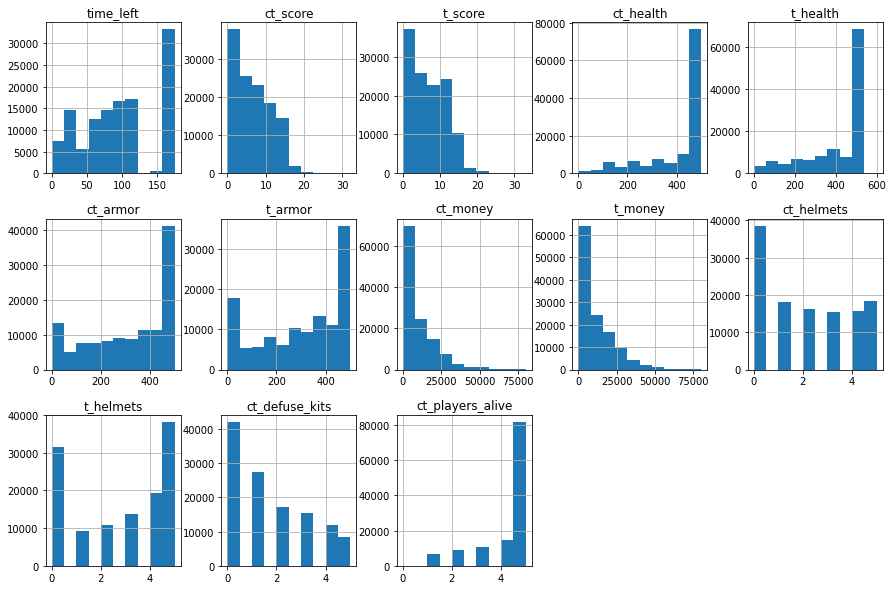

In [ ]:
# Plotting using histogram
csgo_df.hist(column= csgo_df.columns[:15], figsize = (15,10), layout=(3, 5))
plt.show()

As we can see here, we notice a high volume of skewness on the timer suggesting that a lot of rounds had time left to almost full-time. The same case for t_score, ct_score, and the health histograms. Since, helmets and players alive are discrete data.

#### Correlation of each columnns of the data

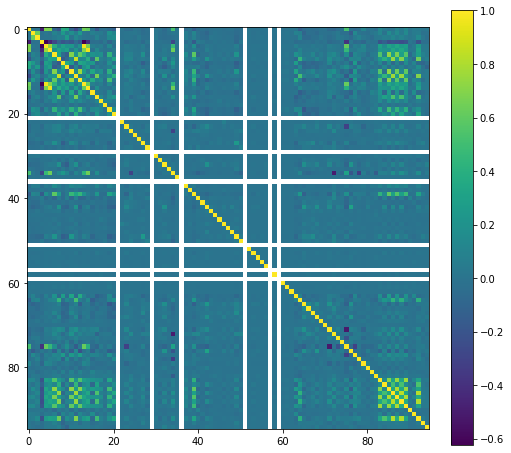

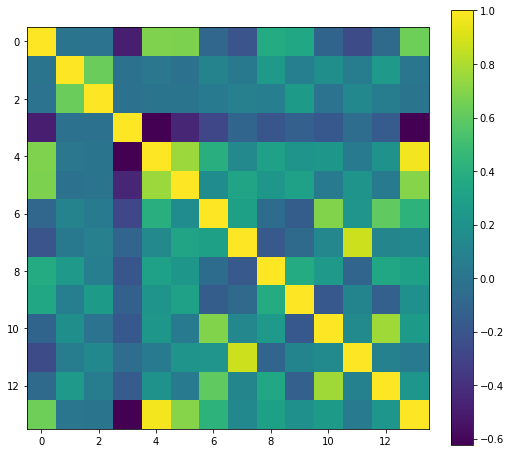

In [ ]:
# Creating a dataframe of the first 15 columns (the non-inventory features)
csgo_df_noninv = csgo_df.iloc[:,:15].copy()

# Get correlations
csgo_df_corr = csgo_df.corr(method="pearson")
csgo_df_noninv_corr = csgo_df_noninv.corr(method="pearson")

# Plot heatmap of all features' correlations
fig, ax = plt.subplots(figsize = (8, 8))
im = ax.imshow(csgo_df_corr, interpolation='nearest')
fig.colorbar(im, orientation='vertical', fraction = 0.05)

# Zooming in on the first 15 feature correlations
fig2, ax2 = plt.subplots(figsize = (8, 8))
im2 = ax2.imshow(csgo_df_noninv_corr, interpolation='nearest')
fig2.colorbar(im, orientation='vertical', fraction = 0.05)

plt.show()

For the correlation matrices we got, we notice here that there are some features with a strong negative correalation as shown by the dark-puple / blue markers. The opposite is for the strong correlated data as shown by the lighter colours.

### Dealing with categorical values

In [ ]:
# Looking at the values of a categorical column: `map`

csgo_df['map'].value_counts()

de_inferno     23811
de_dust2       22144
de_nuke        19025
de_mirage      18576
de_overpass    14081
de_train       13491
de_vertigo     11137
de_cache         145
Name: map, dtype: int64

In [ ]:
# One hot encode the categorical column, which is `map` column

def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    return(res)

csgo_df = encode_and_bind(csgo_df, 'map')

csgo_df.drop('map', axis=1,inplace = True) # Dropping the original column

In [ ]:
# Label encoding the two-categorical columns, which is `bomb_planted` and target column

le = LabelEncoder()

csgo_df['bomb_planted'] = le.fit_transform(csgo_df['bomb_planted']) # 0 - False, 1 - True
csgo_df['round_winner'] = le.fit_transform(csgo_df['round_winner']) # 0 - CT, 1 - T

After cleaning the data, our columns now have expanded to 104. 
This is mainly because of the one-hot-encoded column.
<br> *Quick Maths:* 97 + 8 = 105 - 1 = 104

### Features Generation

In [ ]:
# The difference of t_score and ct_score, which may imply ingame momentum of scores
csgo_df['score_diff'] = csgo_df["t_score"] - csgo_df["ct_score"]

# The equipment value of both teams
# COUNTER TERRORISTS
ctItems = [i for i in csgo_df.columns if i[0:2] == "ct"][7:] # getting inventory columns
ctItems.append("ct_helmets") # appending helmets to col list
ctItems.append("ct_defuse_kits") # appending defuse kits to col list
ctItemCounts = csgo_df[ctItems].copy() # creating a copy of the DF to add a temporary column
ctItemCounts["ctArmor"] = np.ceil(csgo_df["ct_armor"] / 100) # number of people with armor

# TERRORISTS
tItems = [i for i in csgo_df.columns if i[0:2] == "t_"][6:] # getting inventory columns
tItems.append("t_helmets") # appending helmets to col list
tItemCounts = csgo_df[tItems].copy() # creating a copy of the DF to add a temporary column
tItemCounts["tArmor"] = np.ceil(csgo_df["t_armor"] / 100) # number of people with armor
tItemCounts["t_defuse_kits"] = 0 # since terrorists can't buy/hold defuse kits, set to 0


# Prices of weapons, grenades, armor (helmet, body), defuse kit (in that order)
values = [2700, 3300, 4750, 1400, 500, 400, 2050, 5000, 
          2000, 200, 5200, 2900, 3100, 1050, 1300, 1500, 
          1500, 1250, 1700, 1050, 2350, 600, 1100, 5000, 
          3000, 1700 ,1200, 2000, 700, 500, 200, 300, 200, 
          500, 300, 200, 300, 600, 400, 50, 350, 650, 400]

# Multiplying the array of inventory values and the amount the team has
ctItemValues = np.dot(ctItemCounts, np.expand_dims(values, axis = 1)) 
tItemValues = np.dot(tItemCounts, np.expand_dims(values, axis = 1))

# Inserting it into the dataframe
csgo_df.insert(1, "ct_equipment_value", ctItemValues)
csgo_df.insert(1, "t_equipment_value", tItemValues)

After feature generation, the columns increase by 3.
<br> *Quick Maths:* 104 + 3 = 107

In [ ]:
# Re-ordering the columns

csgo_df = csgo_df[['time_left', 'ct_equipment_value', 't_equipment_value', 'ct_score', 't_score', 'score_diff', 'bomb_planted', 'ct_health', 't_health', 'ct_armor', 't_armor', 'ct_money',
 't_money','ct_helmets','t_helmets','ct_defuse_kits','ct_players_alive','t_players_alive','ct_weapon_ak47','t_weapon_ak47','ct_weapon_aug',
 't_weapon_aug','ct_weapon_awp','t_weapon_awp','ct_weapon_bizon','t_weapon_bizon','ct_weapon_cz75auto','t_weapon_cz75auto','ct_weapon_elite','t_weapon_elite',
 'ct_weapon_famas','t_weapon_famas','ct_weapon_g3sg1','t_weapon_g3sg1','ct_weapon_galilar','t_weapon_galilar','ct_weapon_glock','t_weapon_glock','ct_weapon_m249',
 't_weapon_m249','ct_weapon_m4a1s','t_weapon_m4a1s','ct_weapon_m4a4','t_weapon_m4a4','ct_weapon_mac10','t_weapon_mac10','ct_weapon_mag7','t_weapon_mag7','ct_weapon_mp5sd',
 't_weapon_mp5sd','ct_weapon_mp7','t_weapon_mp7','ct_weapon_mp9','t_weapon_mp9','ct_weapon_negev','t_weapon_negev','ct_weapon_nova','t_weapon_nova','ct_weapon_p90',
 't_weapon_p90','ct_weapon_r8revolver','t_weapon_r8revolver','ct_weapon_sawedoff','t_weapon_sawedoff','ct_weapon_scar20','t_weapon_scar20','ct_weapon_sg553',
 't_weapon_sg553','ct_weapon_ssg08','t_weapon_ssg08','ct_weapon_ump45','t_weapon_ump45','ct_weapon_xm1014','t_weapon_xm1014','ct_weapon_deagle','t_weapon_deagle',
 'ct_weapon_fiveseven','t_weapon_fiveseven','ct_weapon_usps','t_weapon_usps','ct_weapon_p250','t_weapon_p250','ct_weapon_p2000','t_weapon_p2000','ct_weapon_tec9',
 't_weapon_tec9','ct_grenade_hegrenade','t_grenade_hegrenade','ct_grenade_flashbang','t_grenade_flashbang','ct_grenade_smokegrenade','t_grenade_smokegrenade',
 'ct_grenade_incendiarygrenade','t_grenade_incendiarygrenade','ct_grenade_molotovgrenade','t_grenade_molotovgrenade','ct_grenade_decoygrenade','t_grenade_decoygrenade',
 'map_de_cache','map_de_dust2','map_de_inferno','map_de_mirage','map_de_nuke','map_de_overpass','map_de_train','map_de_vertigo','round_winner']]

csgo_df

,time_left,ct_equipment_value,t_equipment_value,ct_score,t_score,score_diff,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_bizon,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,ct_weapon_g3sg1,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_glock,t_weapon_glock,ct_weapon_m249,t_weapon_m249,ct_weapon_m4a1s,t_weapon_m4a1s,ct_weapon_m4a4,t_weapon_m4a4,ct_weapon_mac10,t_weapon_mac10,ct_weapon_mag7,t_weapon_mag7,ct_weapon_mp5sd,t_weapon_mp5sd,ct_weapon_mp7,t_weapon_mp7,ct_weapon_mp9,t_weapon_mp9,ct_weapon_negev,t_weapon_negev,ct_weapon_nova,t_weapon_nova,ct_weapon_p90,t_weapon_p90,ct_weapon_r8revolver,t_weapon_r8revolver,ct_weapon_sawedoff,t_weapon_sawedoff,ct_weapon_scar20,t_weapon_scar20,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,t_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,map_de_cache,map_de_dust2,map_de_inferno,map_de_mirage,map_de_nuke,map_de_overpass,map_de_train,map_de_vertigo,round_winner
0,175.00,1000.0,1000.0,0.0,0.0,0.0,0,500.0,500.0,0.0,0.0,4000.0,4000.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0
1,156.03,3250.0,3550.0,0.0,0.0,0.0,0,500.0,500.0,400.0,300.0,600.0,650.0,0.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0
2,96.03,2650.0,2700.0,0.0,0.0,0.0,0,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0
3,76.03,2650.0,2100.0,0.0,0.0,0.0,0,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0
4,174.97,2450.0,1000.0,1.0,0.0,-1.0,0,500.0,500.0,192.0,0.0,18350.0,10750.0,0.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [ ]:
# Saving csgo_df as .csv file
csgo_df.to_csv('csgo_cleaned.csv', index = False)

In [ ]:
# Reading csgo_df
csgo_df = pd.read_csv('csgo_cleaned.csv')

### Splitting the data into train and test set

In [ ]:
# Stratified shuffle split, since we want to keep the proportion between CT and T wins the same
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.3)

for train_index, test_index in split.split(csgo_df, csgo_df["round_winner"]):
    strat_train_set = csgo_df.loc[train_index]
    strat_test_set = csgo_df.loc[test_index]
    
# Get y for the training set, and drop the labels from the 
x_train = strat_train_set.drop("round_winner", axis=1)
y_train = strat_train_set["round_winner"]
x_test = strat_test_set.drop("round_winner", axis=1)
y_test = strat_test_set["round_winner"]

### Creating a pipeline for easier data preprocessing

In [ ]:
# Defining Functions

# One Hot Encode certain columns
def one_hot(dataframe, column):
  def encode_and_bind(original_dataframe, feature_to_encode):
      dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
      res = pd.concat([original_dataframe, dummies], axis=1)
      return(res)

  dataframe = encode_and_bind(dataframe, column)

  dataframe.drop(column, axis=1,inplace = True)
  return dataframe

# Label Encode `bomb_planted` and target column
def label_encode(dataframe):
  le = LabelEncoder()

  dataframe['bomb_planted'] = le.fit_transform(dataframe['bomb_planted'])
  dataframe['round_winner'] = le.fit_transform(dataframe['round_winner'])
  return dataframe

# Feature Generate `score_diff`, `ct_equipment_values`, `t_equipment_values`
def feature_gen(dataframe):
  dataframe['score_diff'] = dataframe['t_score'] - dataframe['ct_score']

  # The equipment value of both teams
  # COUNTER TERRORISTS
  ctItems = [i for i in dataframe.columns if i[0:2] == "ct"][7:] # getting inventory columns
  ctItems.append("ct_helmets") # appending helmets to col list
  ctItems.append("ct_defuse_kits") # appending defuse kits to col list
  ctItemCounts = dataframe[ctItems].copy() # creating a copy of the DF to add a temporary column
  ctItemCounts["ctArmor"] = np.ceil(dataframe["ct_armor"] / 100) # number of people with armor

  # TERRORISTS
  tItems = [i for i in dataframe.columns if i[0:2] == "t_"][6:] # getting inventory columns
  tItems.append("t_helmets") # appending helmets to col list
  tItemCounts = dataframe[tItems].copy() # creating a copy of the DF to add a temporary column
  tItemCounts["tArmor"] = np.ceil(dataframe["t_armor"] / 100) # number of people with armor
  tItemCounts["t_defuse_kits"] = 0 # since terrorists can't buy/hold defuse kits, set to 0


  # Prices of weapons, grenades, armor (helmet, body), defuse kit (in that order)
  values = [2700, 3300, 4750, 1400, 500, 400, 2050, 5000, 
            2000, 200, 5200, 2900, 3100, 1050, 1300, 1500, 
            1500, 1250, 1700, 1050, 2350, 600, 1100, 5000, 
            3000, 1700 ,1200, 2000, 700, 500, 200, 300, 200, 
            500, 300, 200, 300, 600, 400, 50, 350, 650, 400]

  # Multiplying the array of inventory values and the amount the team has
  ctItemValues = np.dot(ctItemCounts, np.expand_dims(values, axis = 1)) 
  tItemValues = np.dot(tItemCounts, np.expand_dims(values, axis = 1))

  # Inserting it into the dataframe
  dataframe.insert(1, "ct_equipment_value", ctItemValues)
  dataframe.insert(1, "t_equipment_value", tItemValues)
  return dataframe

def reorder(dataframe):
  dataframe = dataframe[['time_left', 'ct_equipment_value', 't_equipment_value', 'ct_score', 't_score', 'score_diff', 'bomb_planted', 'ct_health', 't_health', 'ct_armor', 't_armor', 'ct_money',
                        't_money','ct_helmets','t_helmets','ct_defuse_kits','ct_players_alive','t_players_alive','ct_weapon_ak47','t_weapon_ak47','ct_weapon_aug',
                        't_weapon_aug','ct_weapon_awp','t_weapon_awp','ct_weapon_bizon','t_weapon_bizon','ct_weapon_cz75auto','t_weapon_cz75auto','ct_weapon_elite','t_weapon_elite',
                        'ct_weapon_famas','t_weapon_famas','ct_weapon_g3sg1','t_weapon_g3sg1','ct_weapon_galilar','t_weapon_galilar','ct_weapon_glock','t_weapon_glock','ct_weapon_m249',
                        't_weapon_m249','ct_weapon_m4a1s','t_weapon_m4a1s','ct_weapon_m4a4','t_weapon_m4a4','ct_weapon_mac10','t_weapon_mac10','ct_weapon_mag7','t_weapon_mag7','ct_weapon_mp5sd',
                        't_weapon_mp5sd','ct_weapon_mp7','t_weapon_mp7','ct_weapon_mp9','t_weapon_mp9','ct_weapon_negev','t_weapon_negev','ct_weapon_nova','t_weapon_nova','ct_weapon_p90',
                        't_weapon_p90','ct_weapon_r8revolver','t_weapon_r8revolver','ct_weapon_sawedoff','t_weapon_sawedoff','ct_weapon_scar20','t_weapon_scar20','ct_weapon_sg553',
                        't_weapon_sg553','ct_weapon_ssg08','t_weapon_ssg08','ct_weapon_ump45','t_weapon_ump45','ct_weapon_xm1014','t_weapon_xm1014','ct_weapon_deagle','t_weapon_deagle',
                        'ct_weapon_fiveseven','t_weapon_fiveseven','ct_weapon_usps','t_weapon_usps','ct_weapon_p250','t_weapon_p250','ct_weapon_p2000','t_weapon_p2000','ct_weapon_tec9',
                        't_weapon_tec9','ct_grenade_hegrenade','t_grenade_hegrenade','ct_grenade_flashbang','t_grenade_flashbang','ct_grenade_smokegrenade','t_grenade_smokegrenade',
                        'ct_grenade_incendiarygrenade','t_grenade_incendiarygrenade','ct_grenade_molotovgrenade','t_grenade_molotovgrenade','ct_grenade_decoygrenade','t_grenade_decoygrenade',
                        'map_de_cache','map_de_dust2','map_de_inferno','map_de_mirage','map_de_nuke','map_de_overpass','map_de_train','map_de_vertigo','round_winner']]
  return dataframe

def copy_df(dataframe):
   return dataframe.copy()

## Modelling

Before we start our modelling section, we want to focus on the ***Accuracy*** of our model, since our dataset is a balanced dataset and type I and type II hypothesis errors bear the same significance.

In [ ]:
# Supress warnings
import warnings
warnings.filterwarnings("ignore")

### Logistic Regression

In [ ]:
lr = LogisticRegression(max_iter = 1000)

lr.fit(x_train, y_train)

y_pred = lr.predict_proba(x_test)
y_pred_class = lr.predict(x_test)

In [ ]:
print("AUC: {}".format(roc_auc_score(y_test, y_pred[:,1])))
print("Accuracy: {}".format(accuracy_score(y_test, y_pred_class)))
print("Precision: {}".format(precision_score(y_test, y_pred_class)))
print("Recall: {}".format(recall_score(y_test, y_pred_class)))

AUC: 0.8410736000429084
Accuracy: 0.7452550172916156
Precision: 0.754303089536841
Recall: 0.742014742014742


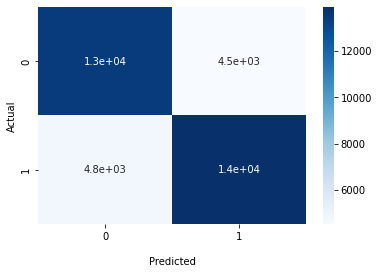

In [ ]:
# Plotting the confusion matrix
ax = sns.heatmap(confusion_matrix(y_test, y_pred_class), cmap='Blues', annot=True)

ax.set_xlabel('\nPredicted')
ax.set_ylabel('Actual');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
plt.show()

### K-Nearest Neighbors

In [ ]:
k = KNeighborsClassifier(n_neighbors=5)

k.fit(x_train,y_train)

y_pred = k.predict_proba(x_test)
y_pred_class = k.predict(x_test)

In [ ]:
print("AUC: {}".format(roc_auc_score(y_test, y_pred[:,1])))
print("Accuracy: {}".format(accuracy_score(y_test, y_pred_class)))
print("Precision: {}".format(precision_score(y_test, y_pred_class)))
print("Recall: {}".format(recall_score(y_test, y_pred_class)))

AUC: 0.8383983949520164
Accuracy: 0.7574272254445443
Precision: 0.7624064171122995
Recall: 0.7615105223800877


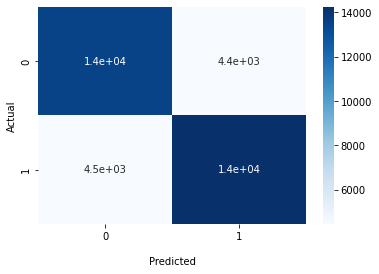

In [ ]:
# Plotting the confusion matrix
ax = sns.heatmap(confusion_matrix(y_test, y_pred_class), cmap='Blues', annot=True)

ax.set_xlabel('\nPredicted')
ax.set_ylabel('Actual');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
plt.show()

### Bernoulli Naive Bayes

In [ ]:
b = BernoulliNB()

b.fit(x_train, y_train)

y_pred = b.predict_proba(x_test)
y_pred_class = b.predict(x_test)

In [ ]:
print("AUC: {}".format(roc_auc_score(y_test, y_pred[:,1])))
print("Accuracy: {}".format(accuracy_score(y_test, y_pred_class)))
print("Precision: {}".format(precision_score(y_test, y_pred_class)))
print("Recall: {}".format(recall_score(y_test, y_pred_class)))

AUC: 0.7849751857427759
Accuracy: 0.6971108024943495
Precision: 0.7095119933829611
Recall: 0.6872663177011004


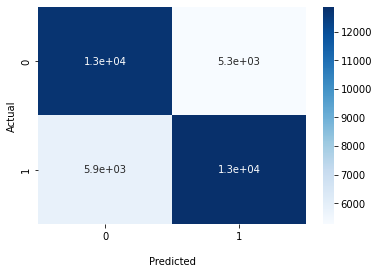

In [ ]:
# Plotting the confusion matrix
ax = sns.heatmap(confusion_matrix(y_test, y_pred_class), cmap='Blues', annot=True)

ax.set_xlabel('\nPredicted')
ax.set_ylabel('Actual');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
plt.show()

### Artificial Neural Networks

In [ ]:
# Building ANN model
model = Sequential()
model.add(Dense(units=106, kernel_initializer = 'random_uniform', activation = 'relu'))
model.add(Dense(units=250, kernel_initializer = 'random_uniform', activation = 'relu'))
model.add(Dense(units=500, kernel_initializer = 'random_uniform', activation = 'relu'))
model.add(Dense(units=750, kernel_initializer = 'random_uniform', activation = 'relu'))
model.add(Dense(units=1, kernel_initializer = 'random_uniform', activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
2678/2678 [==============================] - 31s 11ms/step - loss: 0.5842 - precision: 0.7302 - recall: 0.7321
Epoch 2/50
2678/2678 [==============================] - 29s 11ms/step - loss: 0.5049 - precision: 0.7403 - recall: 0.7295
Epoch 3/50
2678/2678 [==============================] - 29s 11ms/step - loss: 0.4889 - precision: 0.7626 - recall: 0.7092
Epoch 4/50
2678/2678 [==============================] - 41s 15ms/step - loss: 0.4810 - precision: 0.7609 - recall: 0.7164
Epoch 5/50
2678/2678 [==============================] - 33s 12ms/step - loss: 0.4756 - precision: 0.7687 - recall: 0.7077
Epoch 6/50
2678/2678 [==============================] - 29s 11ms/step - loss: 0.4719 - precision: 0.7710 - recall: 0.7124
Epoch 7/50
2678/2678 [==============================] - 29s 11ms/step - loss: 0.4715 - precision: 0.7719 - recall: 0.7094
Epoch 8/50
2678/2678 [==============================] - 38s 14ms/step - loss: 0.4698 - precision: 0.7744 - recall: 0.7071
Epoch 9/50
2678/2678 [==

### XGBoost

In [ ]:
%%time

# XGBoost Algorithm
xgb_class = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                          max_depth = 5, alpha = 10, n_estimators = 1000, eval_metric = 'logloss')

xgb_class.fit(x_train,y_train)

csgo_df_pred = xgb_class.predict_proba(x_test)
csgo_df_pred_class = xgb_class.predict(x_test)

CPU times: user 2min 32s, sys: 290 ms, total: 2min 33s
Wall time: 2min 35s


In [ ]:
print("AUC: {}".format(roc_auc_score(y_test, csgo_df_pred[:,1])))
print("Accuracy: {}".format(accuracy_score(y_test, csgo_df_pred_class)))
print("Precision: {}".format(precision_score(y_test, csgo_df_pred_class)))
print("Recall: {}".format(recall_score(y_test, csgo_df_pred_class)))

AUC: 0.9059270576909693
Accuracy: 0.8140947090379327
Precision: 0.8281741433537494
Recall: 0.8016771712423887


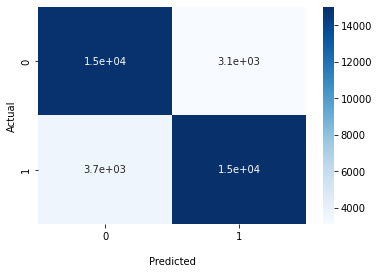

In [ ]:
# Plotting the confusion matrix
ax = sns.heatmap(confusion_matrix(y_test, csgo_df_pred_class), cmap='Blues', annot=True)

ax.set_xlabel('\nPredicted')
ax.set_ylabel('Actual');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
plt.show()

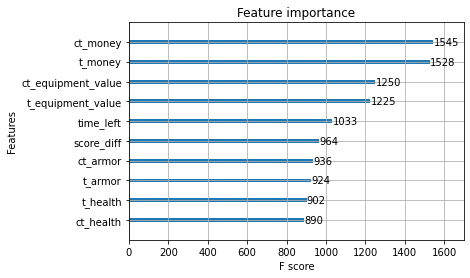

In [ ]:
xgb.plot_importance(xgb_class, max_num_features=10)

In [ ]:
# Cross-validation to help evaluate our result
cv = KFold(n_splits=10, random_state=1, shuffle=True)

model = xgb.XGBClassifier()

x = csgo_df.iloc[:,:-1]
y = csgo_df.iloc[:,-1]

# Evaluate model
scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)

# Report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.757 (0.004)


## Hyper-Parameter Tuning

In [ ]:
# Using wandb.ai

# Setting the Sweep Configuration
sweep_config = {
    "method": "random", # try grid or random
}

In [ ]:
# Setting up the metric and goal of the hyperparameter tuning
metric = {
    'name': 'accuracy',
    'goal': 'maximize'   
    }

sweep_config['metric'] = metric

In [ ]:
# Defining the parameters that we should tune
parameters_dict = {
    'colsample_bytree': {
        'values': [0.4, 0.45, 0.5, 0.55, 0.6, 0.65]
        },
    'learning_rate': {
        'values': [0.1, 0.15, 0.2, 0.25, 0.3]
        },
    'max_depth': {
          'values': [5, 6, 7, 8, 9, 10, 11]
        },
    'alpha': {
        'values': [5, 6, 7, 8, 9, 10, 15]
        },
    'n_estimators': {
        'values': [500, 750, 1000]
        },
    'eval_metric': {
        'values': ['logloss', 'mae', 'rmse']
        }
    }

sweep_config['parameters'] = parameters_dict

In [ ]:
# Displaying the sweep configuration

pprint.pprint(sweep_config)

{'method': 'random',
 'metric': {'goal': 'maximize', 'name': 'accuracy'},
 'parameters': {'alpha': {'values': [5, 6, 7, 8, 9, 10, 15]},
                'colsample_bytree': {'values': [0.4,
                                                0.45,
                                                0.5,
                                                0.55,
                                                0.6,
                                                0.65]},
                'eval_metric': {'values': ['logloss', 'mae', 'rmse']},
                'learning_rate': {'values': [0.1, 0.15, 0.2, 0.25, 0.3]},
                'max_depth': {'values': [5, 6, 7, 8, 9, 10, 11]},
                'n_estimators': {'values': [500, 750, 1000]}}}


In [ ]:
# Initialise the sweep
sweep_id = wandb.sweep(sweep_config, project="ml_final_project")

def hyper():
  config_defaults = {
      'colsample_bytree': 0.3,
      'learning_rate': 0.1,
      'max_depth': 5,
      'alpha': 10,
      'n_estimators': 1000,
      'eval_metric':'logloss'
  }

  wandb.init(config = config_defaults)
  config = wandb.config

  # Set up the model
  xgb_class_hyper = xgb.XGBClassifier(objective = 'binary:logistic', 
                                      colsample_bytree = config.colsample_bytree, 
                                      learning_rate = config.learning_rate,
                                      max_depth = config.max_depth, 
                                      alpha = config.alpha, 
                                      n_estimators = config.n_estimators, 
                                      eval_metric = config.eval_metric)

  xgb_class_hyper.fit(x_train, y_train)

  csgo_df_pred_hyper = xgb_class_hyper.predict(x_test)

  accuracy = accuracy_score(y_test, csgo_df_pred_hyper)
  precision = precision_score(y_test, csgo_df_pred_hyper)
  recall = recall_score(y_test, csgo_df_pred_hyper)

  print("Accuracy: {}".format(accuracy_score(y_test, csgo_df_pred_hyper)))
  print("Precision: {}".format(precision_score(y_test, csgo_df_pred_hyper)))
  print("Recall: {}".format(recall_score(y_test, csgo_df_pred_hyper)))

  wandb.log({'accuracy': accuracy, 'precision': precision, 'recall': recall})

In [ ]:
%%time
# Run the sweep using an agent
wandb.agent(sweep_id, hyper, count=25)

In [ ]:
# From the hyperparameter tuning, we get the result that the best parameters are

''' (objective = 'binary:logistic', 
    colsample_bytree = 0.5, 
    learning_rate = 0.3,
    max_depth = 9, 
    alpha = 6, 
    n_estimators = 1000,
    eval_metric = 'rmse')'''

# Which gives us 0.8955 in accuracy.

" (objective = 'binary:logistic', \n    colsample_bytree = 0.5, \n    learning_rate = 0.3,\n    max_depth = 9, \n    alpha = 6, \n    n_estimators = 1000,\n    eval_metric = 'rmse')"

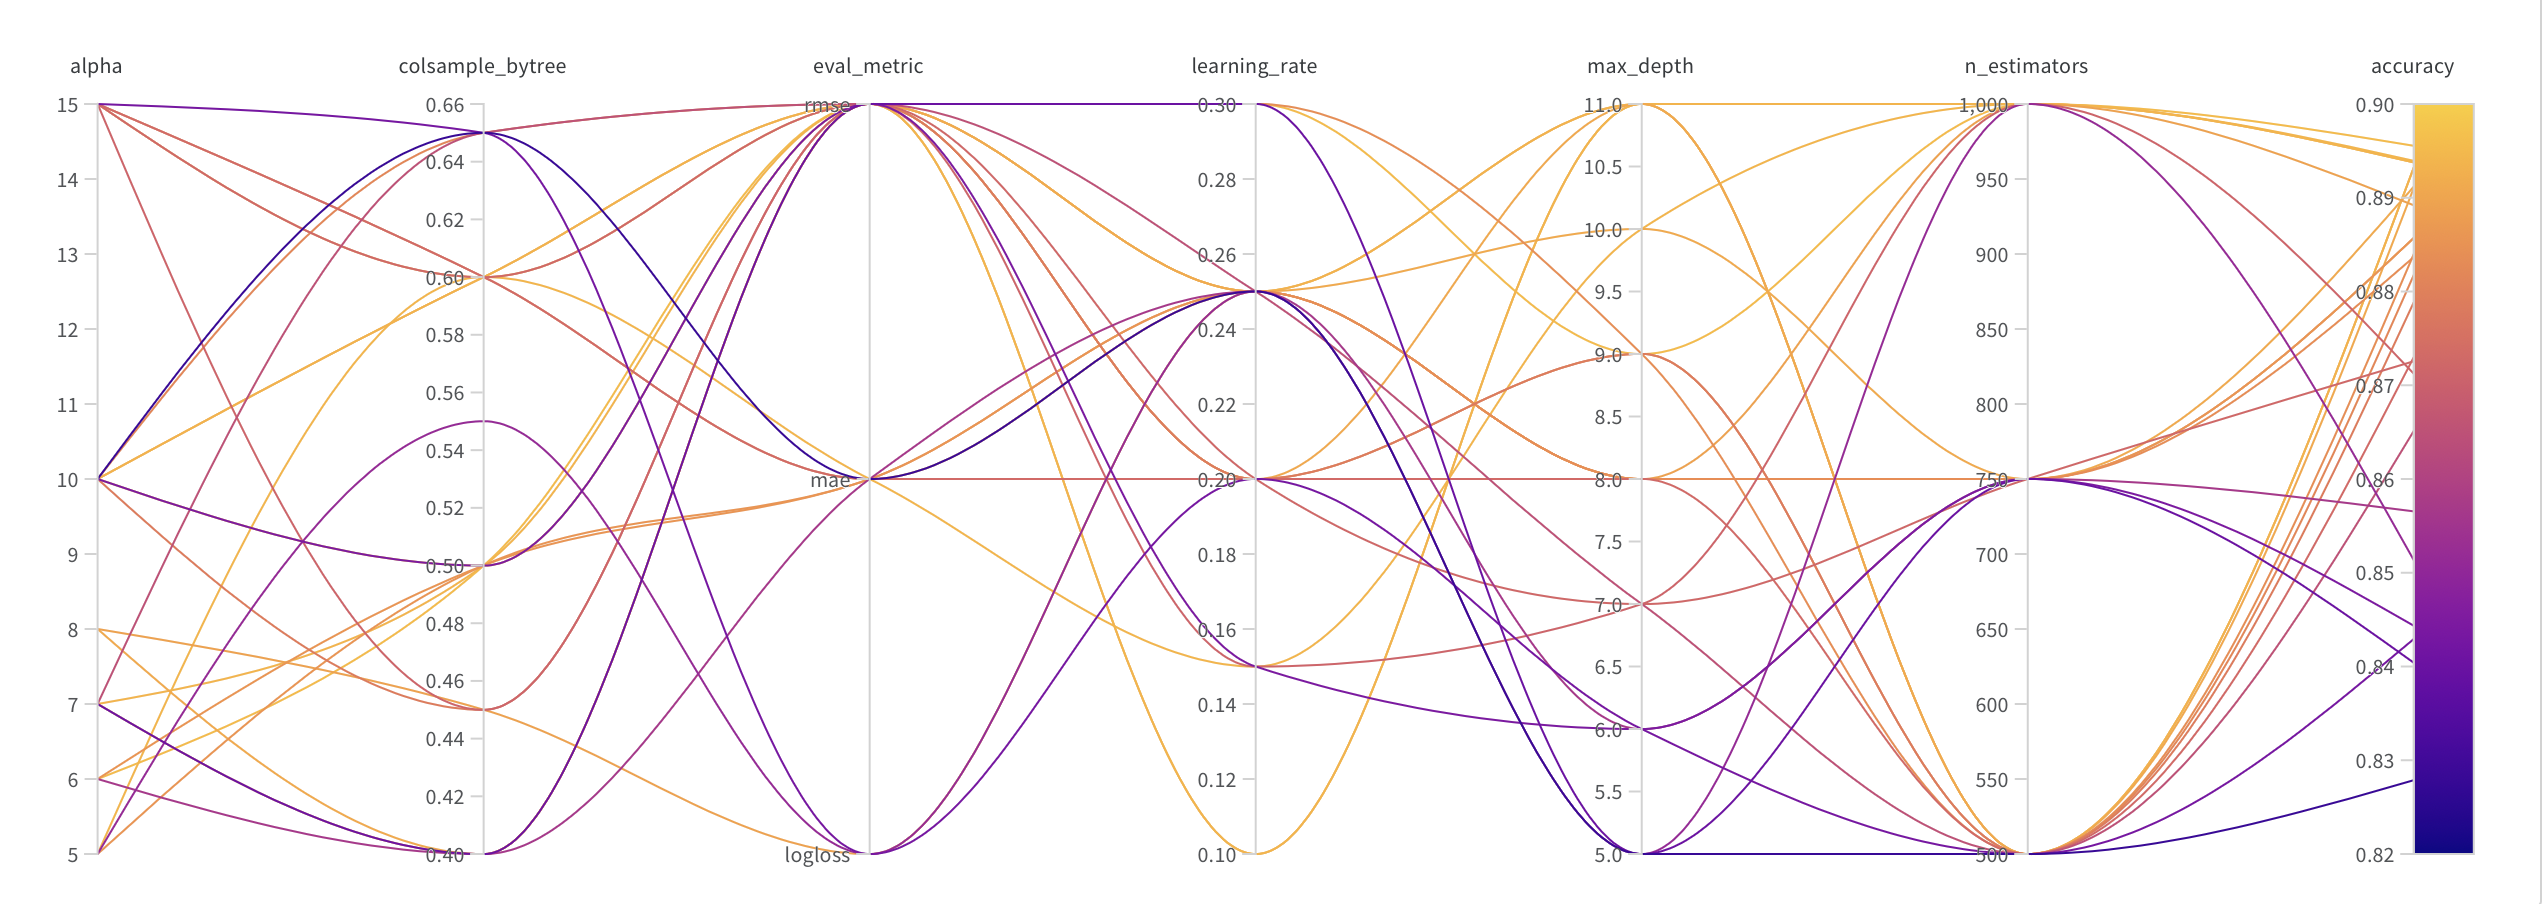

This visualisation shows all the total sweeps that we ran in wand.ai
<br> It shows the 25 combinations of hyper-parameters and their accuracies

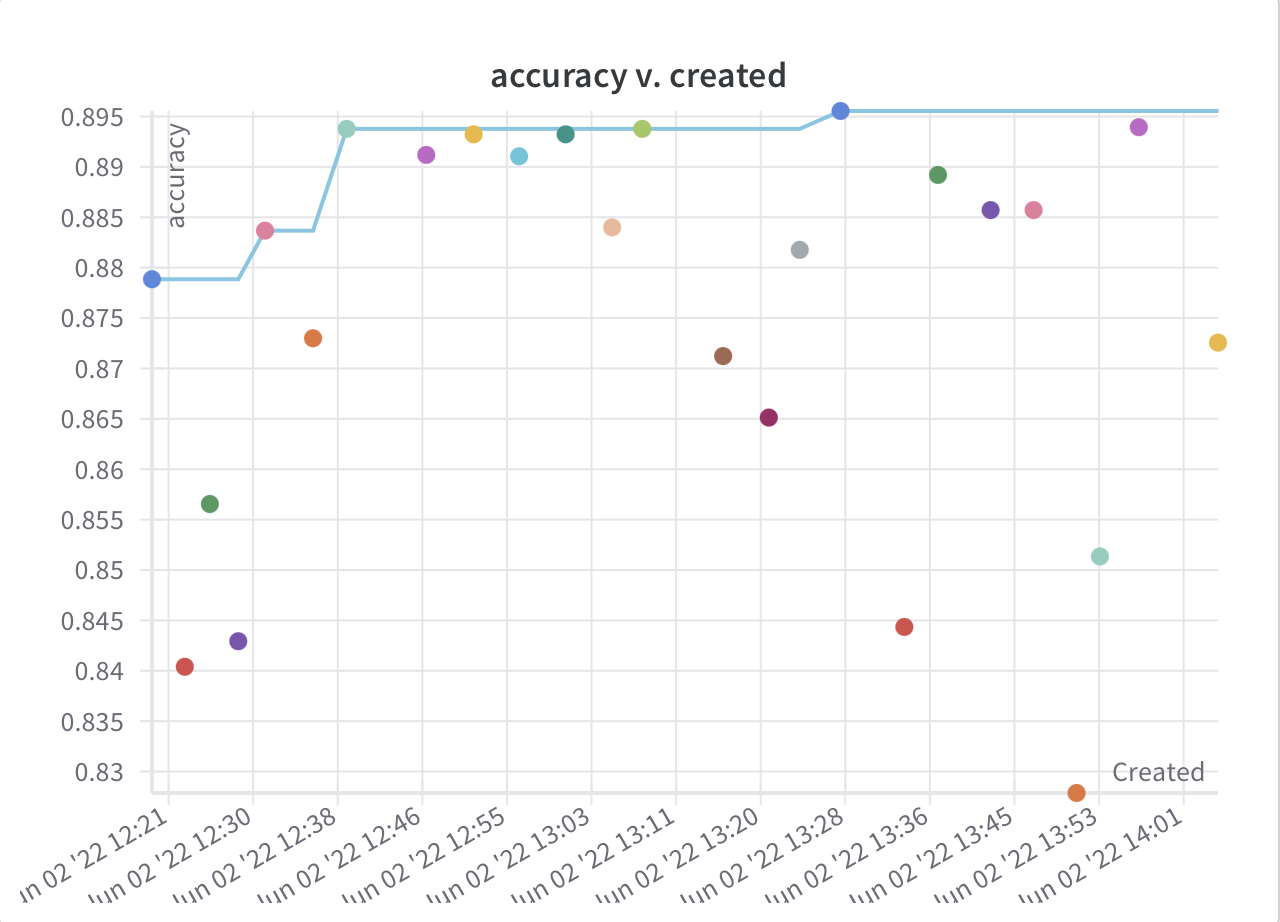

This is the scatter plot of all the sweeps' accuracy.

### Predicting on Holdout Data

#### Preprocessing Holdout Data

This holdout data comes from the most recent major tournament, PGL Major Antwerp 2022. This holdout contains data from over 100 games from May 2022.

In [ ]:
# Reading the holdout data
csgo_2022_df = pd.read_csv('csgo_2022.csv')

csgo_2022_df

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_bizon,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,ct_weapon_g3sg1,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_glock,t_weapon_glock,ct_weapon_m249,t_weapon_m249,ct_weapon_m4a1s,t_weapon_m4a1s,ct_weapon_m4a4,t_weapon_m4a4,ct_weapon_mac10,t_weapon_mac10,ct_weapon_mag7,t_weapon_mag7,ct_weapon_mp5sd,t_weapon_mp5sd,ct_weapon_mp7,t_weapon_mp7,ct_weapon_mp9,t_weapon_mp9,ct_weapon_negev,t_weapon_negev,ct_weapon_nova,t_weapon_nova,ct_weapon_p90,t_weapon_p90,ct_weapon_r8revolver,t_weapon_r8revolver,ct_weapon_sawedoff,t_weapon_sawedoff,ct_weapon_scar20,t_weapon_scar20,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,t_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,45.750000,0,0,de_ancient,False,500,500,400,400,600,700,0,0,1,5,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,T
1,44.750000,0,0,de_ancient,False,500,500,400,400,600,700,0,0,1,5,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,T
2,43.750000,0,0,de_ancient,False,500,500,400,400,600,700,0,0,1,5,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,T
3,42.750000,0,0,de_ancient,False,500,500,400,400,600,700,0,0,1,5,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,T
4,41.750000,0,0,de_ancient,False,500,500,400,400,600,700,0,0,1,5,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248808,4.937008,9,15,de_inferno,True,200,421,200,487,200,1400,2,5,0,5,2,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,T
248809,3.929134,9,15,de_inferno,True,178,421,196,487,200,1400,2,5,1,5,2,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,T
248810,2.921260,9,15,de_inferno,True,100,421,100,487,200,1700,1,5,0,5,1,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,T
248811,1.913386,9,15,de_inferno,True,100,421,100,487,200,1700,1,5,0,5,1,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,T


In [ ]:
# Quick data cleaning on the holdout data

# Systematic sampling to get every 20th sample to represent the `csgo_df` data
csgo_2022_df = csgo_2022_df.iloc[::20]

# Removing `de_ancient` from the dataset
csgo_2022_df = csgo_2022_df[csgo_2022_df['map'] != 'de_ancient']

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_bizon,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,ct_weapon_g3sg1,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_glock,t_weapon_glock,ct_weapon_m249,t_weapon_m249,ct_weapon_m4a1s,t_weapon_m4a1s,ct_weapon_m4a4,t_weapon_m4a4,ct_weapon_mac10,t_weapon_mac10,ct_weapon_mag7,t_weapon_mag7,ct_weapon_mp5sd,t_weapon_mp5sd,ct_weapon_mp7,t_weapon_mp7,ct_weapon_mp9,t_weapon_mp9,ct_weapon_negev,t_weapon_negev,ct_weapon_nova,t_weapon_nova,ct_weapon_p90,t_weapon_p90,ct_weapon_r8revolver,t_weapon_r8revolver,ct_weapon_sawedoff,t_weapon_sawedoff,ct_weapon_scar20,t_weapon_scar20,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,t_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
7000,70.401575,0,0,de_inferno,False,500,500,400,300,600,650,0,0,0,5,5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,5,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,2,0,0,CT
7020,50.244094,0,0,de_inferno,False,400,385,300,192,900,950,0,0,0,4,4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,4,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,CT
7040,30.086614,0,0,de_inferno,True,200,39,200,0,1800,1850,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,CT
7060,9.929134,0,0,de_inferno,True,168,0,200,0,2100,1850,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,CT
7080,84.629921,1,0,de_inferno,False,500,500,500,100,650,9250,5,1,0,5,5,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,4,0,0,1,0,0,0,0,4,0,4,1,4,1,2,0,0,0,0,0,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248720,33.960630,9,14,de_inferno,True,300,179,298,275,3250,1800,1,3,1,3,3,0,2,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,T
248740,13.803150,9,14,de_inferno,True,92,59,98,89,3650,2200,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,T
248760,53.314961,9,15,de_inferno,False,500,500,472,500,200,200,4,5,1,5,5,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,3,0,0,0,0,0,0,0,0,0,4,2,4,3,3,0,0,1,0,0,T
248780,33.157480,9,15,de_inferno,False,500,500,472,500,200,200,4,5,1,5,5,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,3,0,0,0,0,0,0,0,0,0,2,0,2,1,1,0

In [ ]:
# Running it through the pipeline to preprocess the data
csgo_2022_df_cleaned = (csgo_2022_df.pipe(copy_df).pipe(one_hot, 'map').pipe(label_encode).pipe(feature_gen))

# Creating a zeroes column to match the original data
zeroes = np.zeros(csgo_2022_df_cleaned.shape[0])

csgo_2022_df_cleaned.insert(99, 'map_de_cache', zeroes)
csgo_2022_df_cleaned.insert(105, 'map_de_train', zeroes)

# Apply the reorder pipeline
csgo_2022_df_cleaned = (csgo_2022_df_cleaned.pipe(reorder))

csgo_2022_df_cleaned.reset_index(drop=True, inplace=True)

csgo_2022_df_cleaned

,time_left,ct_equipment_value,t_equipment_value,ct_score,t_score,score_diff,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_bizon,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,ct_weapon_g3sg1,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_glock,t_weapon_glock,ct_weapon_m249,t_weapon_m249,ct_weapon_m4a1s,t_weapon_m4a1s,ct_weapon_m4a4,t_weapon_m4a4,ct_weapon_mac10,t_weapon_mac10,ct_weapon_mag7,t_weapon_mag7,ct_weapon_mp5sd,t_weapon_mp5sd,ct_weapon_mp7,t_weapon_mp7,ct_weapon_mp9,t_weapon_mp9,ct_weapon_negev,t_weapon_negev,ct_weapon_nova,t_weapon_nova,ct_weapon_p90,t_weapon_p90,ct_weapon_r8revolver,t_weapon_r8revolver,ct_weapon_sawedoff,t_weapon_sawedoff,ct_weapon_scar20,t_weapon_scar20,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,t_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,map_de_cache,map_de_dust2,map_de_inferno,map_de_mirage,map_de_nuke,map_de_overpass,map_de_train,map_de_vertigo,round_winner
0,70.401575,5900.0,6950.0,0,0,0,0,500,500,400,300,600,650,0,0,0,5,5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,5,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,2,0,0,0.0,0,1,0,0,0,0.0,0,0
1,50.244094,5100.0,5700.0,0,0,0,0,400,385,300,192,900,950,0,0,0,4,4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,4,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0.0,0,1,0,0,0,0.0,0,0
2,30.086614,1200.0,600.0,0,0,0,1,200,39,200,0,1800,1850,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0,1,0,0,0,0.0,0,0
3,9.929134,1500.0,0.0,0,0,0,1,168,0,200,0,2100,1850,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0,1,0,0,0,0.0,0,0
4,84.629921,19700.0,6300.0,1,0,-1,0,500,500,500,100,650,9250,5,1,0,5,5,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,4,0,0,1,0,0,0,0,4,0,4,1,4,1,2,0,0,0,0,0,0.0,0,1,0,0,0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10413,33.960630,13550.0,13750.0,9,14,5,1,300,179,298,275,3250,1800,1,3,1,3,3,0,2,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0,1,0,0,0,0.0,0,1
10414,13.803150,4500.0,5950.0,9,14,5,1,92,59,98,89,3650,2200,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,1,0,0,0,0.0,0,1
10415,53.314961,16700.0,20500.0,9,15,6,0,500,500,472,500,200,200,4,5,1,5,5,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,5,0,0,1,0,0,0,0,0,0,0

In [ ]:
# Saving the new cleaned data to csv
csgo_2022_df_cleaned.to_csv('csgo_2022_df_cleaned.csv', index=False)

In [ ]:
# Reading the cleaned 2022 csgo data
csgo_2022_df_cleaned = pd.read_csv('csgo_2022_df_cleaned.csv')

In [ ]:
# Splitting the data for holdout test

x_2022_test = csgo_2022_df_cleaned.iloc[:,:-1]
y_2022_test = csgo_2022_df_cleaned.iloc[:,-1]

#### Predicting the holdout dataset using the tuned model

In [ ]:
%%time

xgb_class_final = xgb.XGBClassifier(objective = 'binary:logistic', 
                                    colsample_bytree = 0.5, 
                                    learning_rate = 0.3,
                                    max_depth = 9, 
                                    alpha = 6, 
                                    n_estimators = 1000,
                                    eval_metric = 'rmse')

xgb_class_final.fit(x_train, y_train)

csgo_holdout_pred = xgb_class_final.predict(x_2022_test)

print("Accuracy: {}".format(accuracy_score(y_2022_test, csgo_holdout_pred)))
print("Precision: {}".format(precision_score(y_2022_test, csgo_holdout_pred)))
print("Recall: {}".format(recall_score(y_2022_test, csgo_holdout_pred)))

Accuracy: 0.715396429257055
Precision: 0.7028337061894109
Recall: 0.7333203656876094
CPU times: user 6min 30s, sys: 684 ms, total: 6min 30s
Wall time: 6min 49s


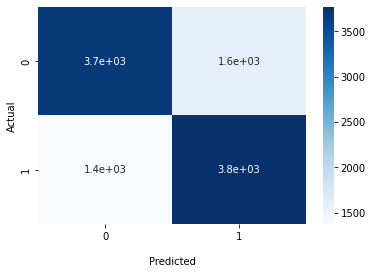

In [ ]:
# Plotting the confusion matrix
ax = sns.heatmap(confusion_matrix(y_2022_test, csgo_holdout_pred), cmap='Blues', annot=True)

ax.set_xlabel('\nPredicted')
ax.set_ylabel('Actual');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
plt.show()

As we can see here, by using 2022 game demos as our holdout data, we are able to achieve 71.5% Accuracy, whereas on test data, we achieved 81.4% accuracy. This means that our model does not generalise greatly.

### Joining all the data and stratify split the new data

Next, we want to merge the original 2019 data with the 2022 data that we previously used as holdout data. The rationale behind this is to help our model generalize towards more recent data, since the original Kaggle dataset is from 2019. 

In order to keep this data balanced when merging, we will stratify the data based on year. But since we originally stratified based on round winner, we have to create a new column that is a combination of both. Stratifying based on this column will lead to both columns being stratified. 

In [ ]:
# Merging the dataset
csgo_df_2019 = pd.read_csv("csgo_cleaned.csv")
csgo_df_2022 = pd.read_csv("csgo_2022_df_cleaned.csv")

# Adding the column `year`
csgo_df_2019["year"] = 2019
csgo_df_2022["year"] = 2022

csgo_df = pd.concat([csgo_df_2019, csgo_df_2022], axis = 0)

csgo_df["year_winner"] = csgo_df["year"].astype(str) + "_" + csgo_df["round_winner"].astype(str)

In [ ]:
# Splitting into three sets
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2)
for train_index, test_index in split.split(csgo_df, csgo_df["year"]):
    strat_train_set = csgo_df.iloc[train_index]
    strat_test_set = csgo_df.iloc[test_index]

# Get y for the training set, and drop the labels from the 
x_train = strat_train_set.drop(columns = ["round_winner"])
y_train = strat_train_set["round_winner"]
x_test = strat_test_set.drop(columns = ["round_winner"])
y_test = strat_test_set["round_winner"]

In [ ]:
# Check stratification
print("---------------------------- DATAFRAME VALUE COUNTS ----------------------------")
print(csgo_df["year_winner"].value_counts(normalize = True))
print(csgo_df["year"].value_counts(normalize = True))
print(csgo_df["round_winner"].value_counts(normalize = True))

print("---------------------------- TRAIN SET VALUE COUNTS ----------------------------")
print(x_train["year_winner"].value_counts(normalize = True))
print(x_train["year"].value_counts(normalize = True))
print(y_train.value_counts(normalize = True))

print("---------------------------- TEST SET VALUE COUNTS ----------------------------")
print(x_test["year_winner"].value_counts(normalize = True))
print(x_test["year"].value_counts(normalize = True))
print(y_test.value_counts(normalize = True))

# Dropping the partition columns
x_train.drop(columns = ["year", "year_winner"], inplace = True)
x_test.drop(columns = ["year", "year_winner"], inplace = True)

---------------------------- DATAFRAME VALUE COUNTS ----------------------------
2019_1    0.469826
2019_0    0.451742
2022_0    0.039728
2022_1    0.038704
Name: year_winner, dtype: float64
2019    0.921568
2022    0.078432
Name: year, dtype: float64
1    0.50853
0    0.49147
Name: round_winner, dtype: float64
---------------------------- TRAIN SET VALUE COUNTS ----------------------------
2019_1    0.469801
2019_0    0.451770
2022_0    0.039497
2022_1    0.038932
Name: year_winner, dtype: float64
2019    0.921571
2022    0.078429
Name: year, dtype: float64
1    0.508733
0    0.491267
Name: round_winner, dtype: float64
---------------------------- TEST SET VALUE COUNTS ----------------------------
2019_1    0.469924
2019_0    0.451630
2022_0    0.040653
2022_1    0.037793
Name: year_winner, dtype: float64
2019    0.921554
2022    0.078446
Name: year, dtype: float64
1    0.507717
0    0.492283
Name: round_winner, dtype: float64


The model below, using the tuned hyperparameters, holds an accuracy of 90%, which is better than our previous dataset.

In [ ]:
%%time

# Predicting on test data using the tuned model and stratified merged data
xgb_class_final = xgb.XGBClassifier(objective = 'binary:logistic', 
                                    colsample_bytree = 0.5, 
                                    learning_rate = 0.3,
                                    max_depth = 9, 
                                    alpha = 6, 
                                    n_estimators = 1000,
                                    eval_metric = 'rmse')

xgb_class_final.fit(x_train, y_train)

y_pred = xgb_class_final.predict(x_test)

print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))
print("Precision: {}".format(precision_score(y_test, y_pred)))
print("Recall: {}".format(recall_score(y_test, y_pred)))

Accuracy: 0.9025446058872243
Precision: 0.9041156840934371
Recall: 0.9039145907473309
CPU times: user 7min 21s, sys: 550 ms, total: 7min 22s
Wall time: 7min 21s


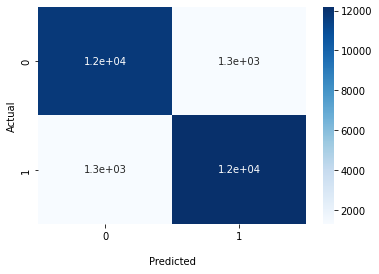

In [ ]:
# Plotting the confusion matrix
ax = sns.heatmap(confusion_matrix(y_test, y_pred), cmap='Blues', annot=True)

ax.set_xlabel('\nPredicted')
ax.set_ylabel('Actual');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
plt.show()

#### Holdout of the merged data

Since we merged the previous holdout data into our training data, our new holdout data will be taken from a major tournament from 2021. This comes from the PGL Major Stockholm of 2021.

In [ ]:
# Reading a new holdout data
stockholm_df = pd.read_csv('stockholm_clean.csv')

# Splitting it into features and target column for validation
x_holdout = stockholm_df.iloc[:,:-1]
y_holdout = stockholm_df.iloc[:,-1]

In [ ]:
%%time

# Predicting on test data using the tuned model and holdout_holdout data
xgb_class_final = xgb.XGBClassifier(objective = 'binary:logistic', 
                                    colsample_bytree = 0.5, 
                                    learning_rate = 0.3,
                                    max_depth = 9, 
                                    alpha = 6, 
                                    n_estimators = 1000,
                                    eval_metric = 'rmse')

xgb_class_final.fit(x_train, y_train)

y_pred = xgb_class_final.predict(x_holdout)

print("Accuracy: {}".format(accuracy_score(y_holdout, y_pred)))
print("Precision: {}".format(precision_score(y_holdout, y_pred)))
print("Recall: {}".format(recall_score(y_holdout, y_pred)))

Accuracy: 0.7493515680264089
Precision: 0.7225047043279818
Recall: 0.7559800594864061
CPU times: user 7min 34s, sys: 712 ms, total: 7min 34s
Wall time: 7min 34s


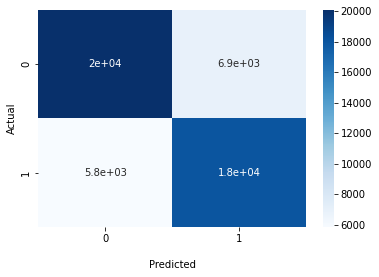

In [ ]:
# Plotting the confusion matrix
ax = sns.heatmap(confusion_matrix(y_holdout, y_pred), cmap='Blues', annot=True)

ax.set_xlabel('\nPredicted')
ax.set_ylabel('Actual');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
plt.show()

#### Amateur games data

In [ ]:
# Reading the amateur games
amateur_df = pd.read_csv('mygames.csv')

# Running it through the pipeline to preprocess the data
amateur_df_cleaned = (amateur_df.pipe(copy_df).pipe(one_hot, 'map').pipe(label_encode).pipe(feature_gen))

# Creating a zeroes column to match the original data
zeroes = np.zeros(amateur_df_cleaned.shape[0])

amateur_df_cleaned.insert(1, 'map_de_cache', zeroes)
amateur_df_cleaned.insert(1, 'map_de_train', zeroes)
amateur_df_cleaned.insert(1, 'map_de_inferno', zeroes)
amateur_df_cleaned.insert(1, 'map_de_nuke', zeroes)
amateur_df_cleaned.insert(1, 'map_de_overpass', zeroes)
amateur_df_cleaned.insert(1, 'map_de_vertigo', zeroes)

# Apply the reorder pipeline
amateur_df_cleaned = (amateur_df_cleaned.pipe(reorder))

amateur_df_cleaned.reset_index(drop=True, inplace=True)

amateur_df_cleaned

,time_left,ct_equipment_value,t_equipment_value,ct_score,t_score,score_diff,bomb_planted,ct_health,t_health,ct_armor,...,t_grenade_decoygrenade,map_de_cache,map_de_dust2,map_de_inferno,map_de_mirage,map_de_nuke,map_de_overpass,map_de_train,map_de_vertigo,round_winner
0,58.142857,1800.0,2950.0,0,0,0,0,500,500,200,...,0,0.0,0,0.0,1,0.0,0.0,0.0,0.0,1
1,56.111111,2200.0,3600.0,0,0,0,0,500,500,300,...,0,0.0,0,0.0,1,0.0,0.0,0.0,0.0,1
2,54.079365,2200.0,3600.0,0,0,0,0,500,500,300,...,0,0.0,0,0.0,1,0.0,0.0,0.0,0.0,1
3,52.047619,2200.0,3600.0,0,0,0,0,500,500,300,...,0,0.0,0,0.0,1,0.0,0.0,0.0,0.0,1
4,50.015873,2200.0,3600.0,0,0,0,0,500,500,300,...,0,0.0,0,0.0,1,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4248,9.781250,3450.0,8200.0,8,7,-1,0,100,200,100,...,0,0.0,0,0.0,1,0.0,0.0,0.0,0.0,1
4249,7.781250,3450.0,8200.0,8,7,-1,0,100,200,100,...,0,0.0,0,0.0,1,0.0,0.0,0.0,0.0,1
4250,5.781250,3450.0,8200.0,8,7,-1,0,100,200,100,...,0,0.0,0,0.0,1,0.0,0.0,0.0,0.0,1
4251,3.781250,3450.0,8200.0,8,7,-1,0,100,200,100,...,0,0.0,0,0.0,1,0.0,0.0,0.0,0.0,1


In [ ]:
# Splitting it into features and target column for validation
x_amt = amateur_df_cleaned.iloc[:,:-1]
y_amt = amateur_df_cleaned.iloc[:,-1]

In [ ]:
%%time

# Predicting on amateur data using the tuned model
xgb_class_final = xgb.XGBClassifier(objective = 'binary:logistic', 
                                    colsample_bytree = 0.5, 
                                    learning_rate = 0.3,
                                    max_depth = 9, 
                                    alpha = 6, 
                                    n_estimators = 1000,
                                    eval_metric = 'rmse')

xgb_class_final.fit(x_train, y_train)

y_pred = xgb_class_final.predict(x_amt)

print("Accuracy: {}".format(accuracy_score(y_amt, y_pred)))
print("Precision: {}".format(precision_score(y_amt, y_pred)))
print("Recall: {}".format(recall_score(y_amt, y_pred)))

Accuracy: 0.7216082765106984
Precision: 0.6862934362934363
Recall: 0.7269938650306749
CPU times: user 7min 40s, sys: 605 ms, total: 7min 41s
Wall time: 7min 40s


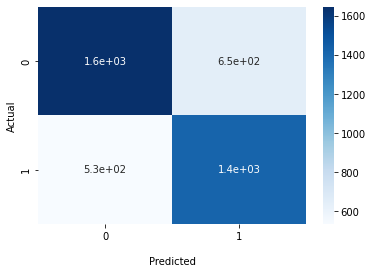

In [ ]:
# Plotting the confusion matrix
ax = sns.heatmap(confusion_matrix(y_amt, y_pred), cmap='Blues', annot=True)

ax.set_xlabel('\nPredicted')
ax.set_ylabel('Actual');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
plt.show()

## Conclusion

Our dataset consisted of 122410 rows and 97 columns before preprocessing.
Post preprocessing, our dataframe becomes 122410 rows and 107 columns.
We one-hot encoded the `map` column and label encoded the `bomb_planted` and `round_winner` columns. Additionally, we generated three features out of our original dataset, those are `score_diff`, `ct_equipment_values`, and `t_equipment_values`. <br>
<br> The best machine learning algorithm for the CS:GO dataset is *XGBoost*. We tried using other algorithms such as KNN, Naive Bayes, Logistic Regression, and Artificial Neural Network, however, *XGBoost* showed the highest accuracy. Using `wandb.ai`, we were able to find the best hyperparameter for the *XGBoost* algorithm, that increased the accuracy of our model by roughly nine percent. Moreover, we also checked our model's performance on the 2022 Matches holdout data and showed that the accuracy was 72%. Which means that our model still generalises pretty well.